In [1]:
figuredir = "../figures/LSTM/"
import os

CHECK_FOLDER = os.path.isdir(figuredir)

if not CHECK_FOLDER:
    os.makedirs(figuredir)
    print("created folder : ", figuredir)
    
else:
    print(figuredir, "folder already exists")

../figures/LSTM/ folder already exists


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams['agg.path.chunksize'] = 10000

In [3]:
np.random.seed(7)

In [4]:
data = pd.read_csv('../datasets/moving_average/Healthy-moving-average.csv')
data.info(), data.head(), data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   speed          507 non-null    float64
 1   vibration      507 non-null    float64
 2   vibration_SMA  507 non-null    float64
 3   Faults         507 non-null    object 
dtypes: float64(3), object(1)
memory usage: 16.0+ KB


(None,
       speed  vibration  vibration_SMA   Faults
 0  0.036346   0.004049      -0.000680  Healthy
 1  0.037003   0.003720      -0.000562  Healthy
 2  0.036346   0.005693      -0.000411  Healthy
 3  0.036346   0.005035      -0.000279  Healthy
 4  0.036017   0.005693      -0.000128  Healthy,
 (507, 4))

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


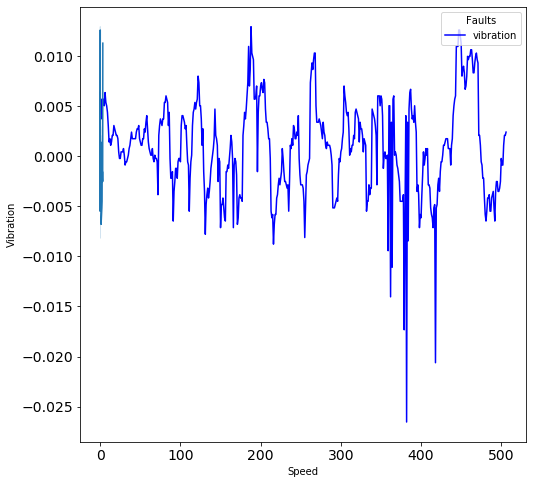

In [5]:
data['vibration'].plot(color='b',figsize=(8,8))
g = sns.lineplot(x="speed", y="vibration",data=data.reset_index())
plt.legend(loc=2)
plt.ylabel("Vibration")
plt.xlabel("Speed")
plt.tick_params(axis='both',labelsize=14)
g.legend(loc='upper right')
g.legend_.set_title("Faults")
plt.savefig(figuredir + "virbration-vs-speed-moving-average.png", bbox_inches='tight',dpi=1200)

In [6]:
vibration = data['vibration']
vibration = pd.DataFrame(vibration)
vibration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vibration  507 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [7]:
vibration.head()

,vibration
0,0.004049
1,0.003720
2,0.005693
3,0.005035
4,0.005693


In [8]:
df = vibration.iloc[0:600]
df

,vibration
0,0.004049
1,0.003720
2,0.005693
3,0.005035
4,0.005693
...,...
502,-0.000884
503,0.001089
504,0.002076
505,0.002076


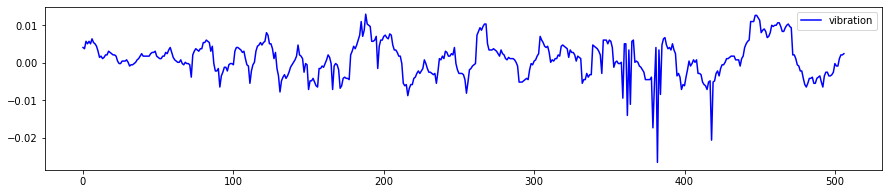

In [9]:
df.plot(color='b',figsize = (15,3))

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
normalisedVibration = scaler.fit_transform(df)
normalisedVibration = pd.DataFrame(normalisedVibration)

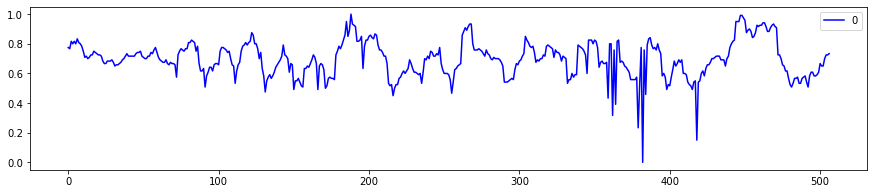

In [11]:
normalisedVibration.plot(color='b',figsize = (15, 3))

In [12]:
dataset = normalisedVibration
dataset = pd.DataFrame(dataset)
dataset

,0
0,0.775000
1,0.766667
2,0.816667
3,0.800000
4,0.816667
...,...
502,0.650000
503,0.700000
504,0.725000
505,0.725000


In [13]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

print("Total Dataset        = ", len(dataset))
print("Training Sample      = ", train_size)
print("Testing Sample       = ", test_size)

Total Dataset        =  507
Training Sample      =  339
Testing Sample       =  168


In [14]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back])
    return np.array(dataX), np.array(dataY)

In [15]:
look_back = 20
trainX, trainY = create_dataset(train[0], look_back)
testX, testY = create_dataset(test[0], look_back)

In [16]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [17]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
#model.add(Dense(50))
#model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
318/318 [==============================] - 1s 2ms/step - loss: 0.1117
Epoch 2/50
318/318 [==============================] - 1s 2ms/step - loss: 0.0664
Epoch 3/50
318/318 [==============================] - 1s 2ms/step - loss: 0.0589
Epoch 4/50
318/318 [==============================] - 1s 2ms/step - loss: 0.0562
Epoch 5/50
318/318 [==============================] - 0s 531us/step - loss: 0.0526
Epoch 6/50
318/318 [==============================] - 0s 517us/step - loss: 0.0519
Epoch 7/50
318/318 [==============================] - 0s 533us/step - loss: 0.0481
Epoch 8/50
318/318 [==============================] - 0s 574us/step - loss: 0.0472
Epoch 9/50
318/318 [==============================] - 1s 2ms/step - loss: 0.0468
Epoch 10/50
318/318 [==============================] - 1s 2ms/step - loss: 0.0451
Epoch 11/50
318/318 [==============================] - 1s 2ms/step - loss: 0.0451
Epoch 12/50
318/318 [==============================] - 1s 2ms/step - loss: 0.0444
Epoch 13/50
318/3

In [18]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

print('Train Score: MAE',mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Test Score: MAE',mean_absolute_error(testY[0], testPredict[:,0]))

MAEPTr = mean_absolute_percentage_error(trainY[0], trainPredict[:,0])
MAEPTs = mean_absolute_percentage_error(testY[0], testPredict[:,0])

print('Train Score: MARP = {}%'.format(MAEPTr))
print('Test Score: MARP = {}%'.format(MAEPTs))

5/5 [==============================] - 0s 531us/step
Train Score: MAE 0.0012455212347129159
Test Score: MAE 0.0027015296018331595
Train Score: MARP = 1.0066971287074955%
Test Score: MARP = 1.221595793881702%


In [19]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [20]:
dataset.shape

(507, 1)

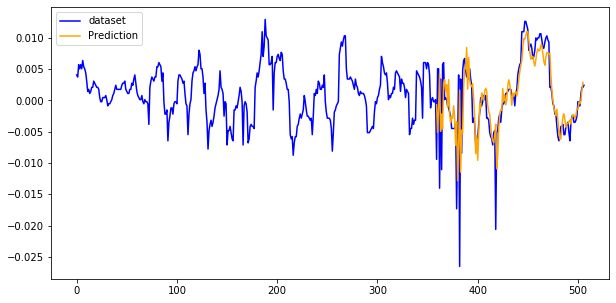

In [21]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(dataset), label='dataset',color='blue')
plt.plot(testPredictPlot,label='Prediction',color='orange')

plt.legend(loc=2)
plt.ylabel=("Vibration")
plt.xlabel=("Records")

plt.savefig(figuredir + "LSTM-Forcasting-after-filter-moving-average.png",bbox_inches='tight', dpi=1200)
plt.show()